In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-dataset-from-cardekho/car data.csv
/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv
/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv


In [2]:
df = pd.read_csv('/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv')

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
#shape
df.shape

(8128, 13)

In [5]:
#number of dropped rows
8128 - 7906

222

In [6]:
#missing value
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [7]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [8]:
#duplicate
df.duplicated().sum()

1202

In [9]:
# describe function
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [10]:
#Observations
# 1. Missing Values in some cols
# 2. Seats in float should be int
# 3. More than 1000 rows duplicated
# 4. Outliers in year,seats,selling price
# 5. Torque,Engine,max_power,mileage have unnecessary units

In [11]:
#Remove missing values
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [13]:
df.shape

(7906, 13)

In [14]:
df = df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
df['seats'] = df['seats'].astype('int32')

In [17]:
df['mileage'] = df['mileage'].str.split(expand=True)[0]
df['mileage'] = df['mileage'].astype('float64')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6717 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6717 non-null   object 
 1   year           6717 non-null   int64  
 2   selling_price  6717 non-null   int64  
 3   km_driven      6717 non-null   int64  
 4   fuel           6717 non-null   object 
 5   seller_type    6717 non-null   object 
 6   transmission   6717 non-null   object 
 7   owner          6717 non-null   object 
 8   mileage        6717 non-null   float64
 9   engine         6717 non-null   object 
 10  max_power      6717 non-null   object 
 11  torque         6717 non-null   object 
 12  seats          6717 non-null   int32  
dtypes: float64(1), int32(1), int64(3), object(8)
memory usage: 708.4+ KB


In [19]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248 CC,74 bhp,190Nm@ 2000rpm,5
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5


In [20]:
df['engine'] = df['engine'].str.split(expand=True)[0]
df['engine'] = df['engine'].astype('int32')

In [21]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74 bhp,190Nm@ 2000rpm,5
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52 bhp,250Nm@ 1500-2500rpm,5
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78 bhp,"12.7@ 2,700(kgm@ rpm)",5
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90 bhp,22.4 kgm at 1750-2750rpm,5
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5


In [22]:
df['max_power'] = df['max_power'].str.split(expand=True)[0]
df['max_power'] = df['max_power'].astype('float64')

In [23]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190Nm@ 2000rpm,5
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5


In [24]:
df.drop(columns=['torque'],inplace=True)

In [25]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5


In [26]:
df['name'].unique().shape

(1982,)

In [27]:
df['brand']=df['name'].str.split(expand=True)[0]

In [28]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5,Skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5,Honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,Hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5,Maruti


In [29]:
df.drop(columns=['name'],inplace=True)

In [30]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,Maruti
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5,Skoda
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5,Honda
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,Hyundai
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5,Maruti


In [31]:
df['brand'].unique().shape

(31,)

In [32]:
df['brand'].value_counts()

Maruti           2089
Hyundai          1214
Mahindra          709
Tata              633
Honda             361
Ford              353
Toyota            324
Chevrolet         216
Renault           206
Volkswagen        173
Nissan             73
Skoda              69
Datsun             57
Mercedes-Benz      46
BMW                45
Fiat               39
Audi               33
Jeep               22
Mitsubishi         11
Volvo               9
Jaguar              8
Force               4
Isuzu               4
Ambassador          4
MG                  3
Kia                 3
Land                3
Daewoo              3
Ashok               1
Opel                1
Lexus               1
Name: brand, dtype: int64

In [33]:
df.shape

(6717, 12)

In [34]:
freq_brands = df['brand'].value_counts()[df['brand'].value_counts()>100].index.tolist()

In [35]:
freq_brands

['Maruti',
 'Hyundai',
 'Mahindra',
 'Tata',
 'Honda',
 'Ford',
 'Toyota',
 'Chevrolet',
 'Renault',
 'Volkswagen']

In [36]:
df = df[df['brand'].isin(freq_brands)]

In [37]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,Maruti
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5,Honda
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,Hyundai
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5,Maruti
5,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5,Hyundai


In [38]:
df['fuel'].value_counts()

Diesel    3360
Petrol    2832
CNG         51
LPG         35
Name: fuel, dtype: int64

In [39]:
freq_fuel = ['Diesel','Petrol']
df = df[df['fuel'].isin(freq_fuel)]

In [40]:
df['fuel'].value_counts()

Diesel    3360
Petrol    2832
Name: fuel, dtype: int64

In [41]:
df['seller_type'].value_counts()

Individual          5607
Dealer               560
Trustmark Dealer      25
Name: seller_type, dtype: int64

In [42]:
df = df[df['seller_type'].isin(['Individual','Dealer'])]

In [43]:
df['seller_type'].value_counts()

Individual    5607
Dealer         560
Name: seller_type, dtype: int64

In [44]:
df['owner'].value_counts()

First Owner             3806
Second Owner            1750
Third Owner              459
Fourth & Above Owner     150
Test Drive Car             2
Name: owner, dtype: int64

In [45]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,Maruti
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5,Honda
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,Hyundai
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5,Maruti
5,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5,Hyundai


In [46]:
df = df[df['owner'].isin(['First Owner','Second Owner','Third Owner'])]

In [47]:
df['owner'].value_counts()

First Owner     3806
Second Owner    1750
Third Owner      459
Name: owner, dtype: int64

In [48]:
df.shape

(6015, 12)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='km_driven'>

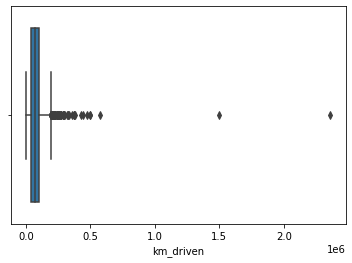

In [49]:
import seaborn as sns
sns.boxplot(df['km_driven'])

In [50]:
q1 = df['km_driven'].quantile(0.25)
q3 = df['km_driven'].quantile(0.75)
iqr = q3 - q1

In [51]:
max_val_km_driven = q3 + 1.5*iqr

In [52]:
max_val_km_driven

193000.0

In [53]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,Maruti
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5,Honda
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,Hyundai
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5,Maruti
5,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5,Hyundai


In [54]:
df['km_driven'] = np.where(df['km_driven']>max_val_km_driven,max_val_km_driven,df['km_driven'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='year'>

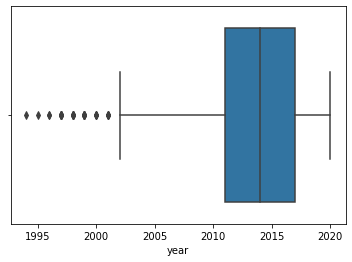

In [55]:
sns.boxplot(df['year'])

In [56]:
df.shape

(6015, 12)

In [57]:
df = df[df['year']>=2000]

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='year'>

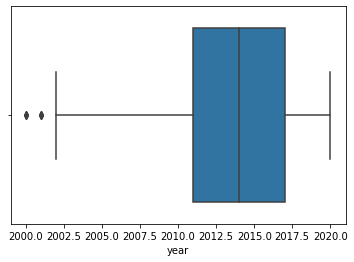

In [58]:
sns.boxplot(df['year'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='mileage'>

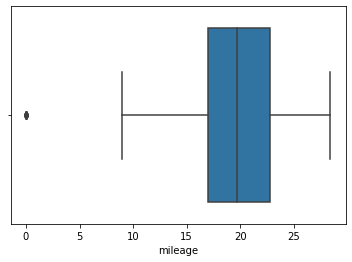

In [59]:
sns.boxplot(df['mileage'])

In [60]:
df[df['mileage']>0]

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand
0,2014,450000,145500.0,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,Maruti
2,2006,158000,140000.0,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5,Honda
3,2010,225000,127000.0,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,Hyundai
4,2007,130000,120000.0,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5,Maruti
5,2017,440000,45000.0,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5,Hyundai
...,...,...,...,...,...,...,...,...,...,...,...,...
8120,2008,120000,191000.0,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,5,Hyundai
8121,2013,260000,50000.0,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,5,Maruti
8122,2014,475000,80000.0,Diesel,Individual,Manual,Second Owner,22.54,1396,88.73,5,Hyundai
8123,2013,320000,110000.0,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5,Hyundai


In [61]:
mean_mileage = df[df['mileage']!=0]['mileage'].median()
mean_mileage

19.7

In [62]:
df['mileage'].describe()

count    5988.000000
mean       19.618317
std         4.001592
min         0.000000
25%        17.000000
50%        19.700000
75%        22.740000
max        28.400000
Name: mileage, dtype: float64

In [63]:
df['mileage'] = np.where(df['mileage']==0,mean_mileage,df['mileage'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='mileage'>

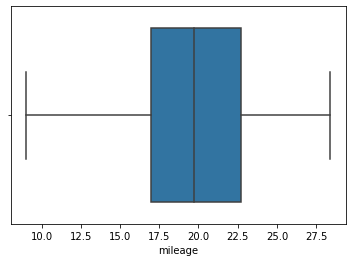

In [64]:
sns.boxplot(df['mileage'])

In [65]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand
0,2014,450000,145500.0,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,Maruti
2,2006,158000,140000.0,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5,Honda
3,2010,225000,127000.0,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,Hyundai
4,2007,130000,120000.0,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5,Maruti
5,2017,440000,45000.0,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5,Hyundai


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='engine'>

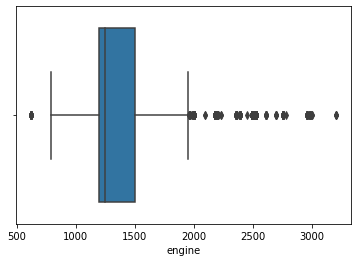

In [66]:
sns.boxplot(df['engine'])

In [67]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand
0,2014,450000,145500.0,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,Maruti
2,2006,158000,140000.0,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5,Honda
3,2010,225000,127000.0,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,Hyundai
4,2007,130000,120000.0,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5,Maruti
5,2017,440000,45000.0,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5,Hyundai


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='max_power'>

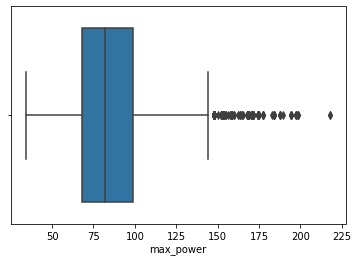

In [68]:
sns.boxplot(df['max_power'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='seats'>

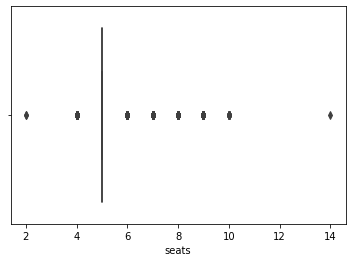

In [69]:
sns.boxplot(df['seats'])

In [70]:
df.shape

(5988, 12)

In [71]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand
0,2014,450000,145500.0,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,Maruti
2,2006,158000,140000.0,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5,Honda
3,2010,225000,127000.0,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,Hyundai
4,2007,130000,120000.0,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5,Maruti
5,2017,440000,45000.0,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5,Hyundai


In [72]:
X = df.drop(columns=['selling_price'])
y = df['selling_price']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [73]:
y_train

4996    200000
2063    351000
5788    200000
593     300000
5191    300000
         ...  
1417    395000
3212    950000
4808    750000
7680    550000
3290    370000
Name: selling_price, Length: 4790, dtype: int64

In [74]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder

In [75]:
tnf = ColumnTransformer(
    [
        ('ordinal',OrdinalEncoder(),['owner']),
        ('nominal',OneHotEncoder(drop='first',sparse=False),['fuel','seller_type','transmission','brand'])
    ],remainder='passthrough'
)

In [76]:
tnf.fit_transform(X_train).shape

(4790, 19)

In [77]:
#X_train_tnf = tnf.fit_transform(X_train)
#X_test_tnf = tnf.transform(X_test)

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
#lr = LinearRegression()

In [80]:
#lr.fit(X_train_tnf,y_train)

In [81]:
#y_pred = lr.predict(X_test_tnf)

In [82]:
from sklearn.metrics import r2_score

In [83]:
#r2_score(y_test,y_pred)

In [84]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)

In [85]:
#X_train_poly = poly.fit_transform(X_train_tnf)
#X_test_poly = poly.transform(X_test_tnf)

In [86]:
lr = LinearRegression()
#lr.fit(X_train_poly,y_train)
#y_pred = lr.predict(X_test_poly)
#r2_score(y_test,y_pred)

In [87]:
from sklearn.pipeline import Pipeline

In [88]:
pipe = Pipeline(
    [
        ('col-transformer',tnf),
        ('poly',poly),
        ('lr',lr)
    ]
)

In [89]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('col-transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal', OrdinalEncoder(),
                                                  ['owner']),
                                                 ('nominal',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['fuel', 'seller_type',
                                                   'transmission',
                                                   'brand'])])),
                ('poly', PolynomialFeatures()), ('lr', LinearRegression())])

In [90]:
y_pred = pipe.predict(X_test)

In [91]:
r2_score(y_test,y_pred)

0.8774692471142709

In [92]:
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand
0,2014,450000,145500.0,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,Maruti
2,2006,158000,140000.0,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5,Honda
3,2010,225000,127000.0,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,Hyundai
4,2007,130000,120000.0,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5,Maruti
5,2017,440000,45000.0,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5,Hyundai
...,...,...,...,...,...,...,...,...,...,...,...,...
8120,2008,120000,191000.0,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,5,Hyundai
8121,2013,260000,50000.0,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,5,Maruti
8122,2014,475000,80000.0,Diesel,Individual,Manual,Second Owner,22.54,1396,88.73,5,Hyundai
8123,2013,320000,110000.0,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5,Hyundai


In [93]:
X_train['brand'].value_counts()

Maruti        1537
Hyundai        920
Mahindra       563
Tata           500
Ford           284
Honda          278
Toyota         235
Chevrolet      167
Renault        167
Volkswagen     139
Name: brand, dtype: int64

In [94]:
import pickle

In [95]:
pickle.dump(pipe,open('pipe.pkl','wb'))